In [ ]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


# Metodo em cadeia e Pipe

In [29]:


df = pd.read_csv('datasets/titanic/train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<AxesSubplot:>

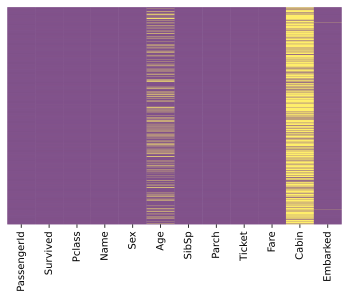

In [4]:
#Verificar dados nulos com seaborn e criar um simples heatmap para verificar os dados perdidos
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

#Age, Cabin e Embarked tem valores perdidos

#Tarefa


#Suponha que nos pediram para dar uma olhada nos passageiros que partiram de Southampton e calcular a taxa de sobrevivência para diferentes faixas etárias e Pclass.


#Vamos dividir essa tarefa em várias etapas e realizá-las passo a passo.

#1-Limpeza de dados: substitua a idade ausente por alguma forma de imputação.

#2-Selecione passageiros partiram de Southampton.

#3-Converter idades em grupos de faixas etárias: ≤12, Adolescente (≤ 18), Adulto (≤ 60) e Mais velho (>60).

#4-Crie uma tabela dinâmica para exibir a taxa de sobrevivência para diferentes faixas etárias e Pclass.

#5-Melhore a exibição da tabela dinâmica renomeando labels(rótulos) de axis(eixo) e formatando valores.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

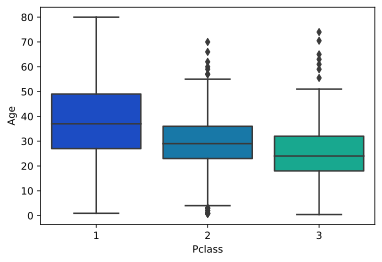

In [12]:
# primeiro passo / Analisando medias de idades com graficos seaborn
sns.boxplot(x='Pclass',
            y='Age',
            data=df,
            palette='winter')


In [13]:
#We can see the wealthier passengers in the higher classes tend to be older,
#which makes sense. We’ll use these average age values to impute based on Pclass for Age.
pclass_age_map = {
  1: 37,
  2: 29,
  3: 24,
}
def replace_age_na(x_df, fill_map):
    cond=x_df['Age'].isna()
    res=x_df.loc[cond,'Pclass'].map(fill_map)
    x_df.loc[cond,'Age']=res
    return x_df


#x_df['Age'].isna() selects the Age column and detects the missing values. 
#Then, x_df.loc[cond, 'Pclass'] is used to access Pclass values conditionally and 
#call Pandas map() for substituting each value with another value.
#Finally, x_df.loc[cond, 'Age']=res conditionally replace all missing Age values with res.

In [11]:
res = (
  pd.read_csv('datasets/titanic/train.csv')
    .pipe(replace_age_na, pclass_age_map)
)
res.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<AxesSubplot:>

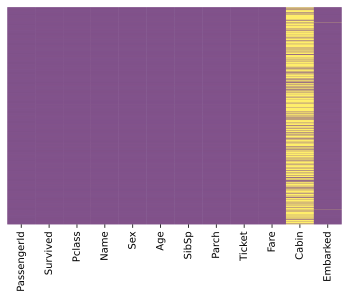

In [15]:
sns.heatmap(res.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

#All missing ages should be replaced based on Pclass for Age. Let’s check this by running the heatmap on res.

In [18]:
#Selecionar passageiros que partiram de Southampton
#According to Titanic Data Dictionary, passengers departed from Southampton should have Embarked with value S .
#Let’s query that using the Pandas query() function
res = (
  pd.read_csv('datasets/titanic/train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked == "S"')
)
res.head()



PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
6            7         0       1   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male  22.0      1      0   
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
6                       McCarthy, Mr. Timothy J    male  54.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
6             17463  51.8625   E46        S

In [19]:
#To evaluate the query result, we can check it with value_counts()
res.Embarked.value_counts()

S    644
Name: Embarked, dtype: int64

In [22]:
#3-Converter idades em grupos de faixas etárias: ≤12, Adolescente (≤ 18), Adulto (≤ 60) e Mais velho (>60).

bins=[0, 13, 19, 61, sys.maxsize]
labels=['<12', 'Teen', 'Adult', 'Older']
res = (
  pd.read_csv('datasets/titanic/train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked == "S"')
    .assign(ageGroup = lambda df: pd.cut(df['Age'], bins=bins, labels=labels))
)
res.head()

#We did this with a custom function in the Pandas pipe function article. Alternatively, 
#we can use Pandas built-in function assign() to add new columns to a DataFrame. Let’s go ahead with assign().

PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
6            7         0       1   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male  22.0      1      0   
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
6                       McCarthy, Mr. Timothy J    male  54.0      0      0   

             Ticket     Fare Cabin Embarked ageGroup  
0         A/5 21171   7.2500   NaN        S    Adult  
2  STON/O2. 3101282   7.9250   NaN        S    Adult  
3            113803  53.1000  C123        S    Adult  
4            373450   8.0500   NaN        S    Adult  
6             17463  51.8625   E46        S    Adult

In [24]:
#4-Crie uma tabela dinâmica para exibir a taxa de sobrevivência para diferentes faixas etárias e Pclass.
#A pivot table allows us to insights into our data. Let’s figure out the survival rate with it.
bins=[0, 13, 19, 61, sys.maxsize]
labels=['<12', 'Teen', 'Adult', 'Older']
(
  pd.read_csv('datasets/titanic/train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked == "S"')
    .assign(ageGroup = lambda df: pd.cut(df['Age'], bins=bins, labels=labels))
    .pivot_table(
        values='Survived', 
        columns='Pclass', 
        index='ageGroup', 
        aggfunc='mean')
)

#The first parameter values='Survived' specifies the column Survived to aggregate. 
#Since the value of Survived is 1 or 0, we can use the aggregation function mean to calculate the survival rate and
#therefore aggfunc='mean' is used. 
#index='ageGroup' and columns='Pclass' will display ageGroup as rows and Pclass as columns in the output table.

Pclass           1         2         3
ageGroup                              
<12       0.750000  1.000000  0.371429
Teen      0.800000  0.400000  0.177778
Adult     0.580952  0.407692  0.166052
Older     0.250000  0.333333  0.500000

In [28]:
#5-Melhore a exibição da tabela dinâmica renomeando labels(rótulos) de axis(eixo) e formatando valores.

bins=[0, 13, 19, 61, sys.maxsize]
labels=['<12', 'Teen', 'Adult', 'Older']
(
  pd.read_csv('datasets/titanic/train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked == "S"')
    .assign(ageGroup = lambda df: pd.cut(df['Age'], bins=bins, labels=labels))
    .pivot_table(
        values='Survived', 
        columns='Pclass', 
        index='ageGroup', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('Class {}'.format, axis='columns')
    .style.format('{:.2%}')
)

#rename_axis() is used to clear the columns label.
#After that, rename('Class {}'.format, axis='columns') is used to format the columns label.
#Finally,style.format('{:.2%}') is used to format values into percentages with 2 decimal places.